#ANALYSIS OVERVIEW
After cleaning the dataset to manage improper encodings and unsanitized inputs, we performed comprehensive exploratory data analysis on the given data, to understand the distribution of trees across Pune.

We analyzed several factors, such as geographic distribution, biological diversity, condition of existing trees, economic impact, natural as well as artificial influences on health of trees, etc. 

Based on these factors, we come up with a conclusive report regarding the existing green cover of Pune city as well as necessary steps to be taken to improve the ecological landscape



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv('trees_cleaned.csv')
%matplotlib notebook

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


FileNotFoundError: ignored

## Clustering By Locale
It's observed that the distribution of trees can be broken down into 7 broad regions by geographic co-ordinates.

As can be seen from the below plots, density is highly concentrated in certain regions, and almost non-existent in others.
Thus, one of the first steps to be taken is to plant more trees in the regions with very low concentration of trees.

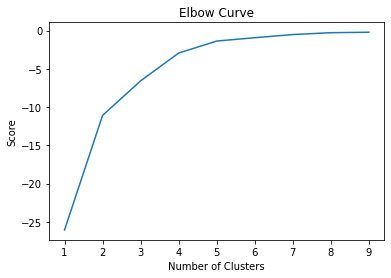

In [0]:
X_clustering = df[['northing', 'easting']]
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_clustering).score(X_clustering) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

[5 5 5 ... 0 0 0]


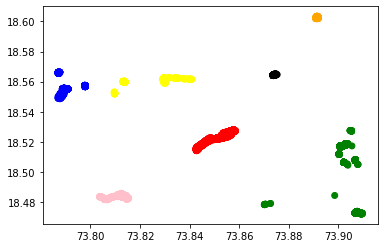

In [0]:
model = KMeans(n_clusters = 7)
model.fit(X_clustering)
print(model.labels_)
colormap = np.array(['Red', 'Blue', 'Green', 'Orange', 'Pink', 'Black', 'Yellow'])
z = plt.scatter(X_clustering.easting, X_clustering.northing, c = colormap[model.labels_])

The below code block represents distribution of trees by regional cluster

In [0]:
from collections import Counter, defaultdict
print(Counter(model.labels_))

Counter({0: 2898, 3: 2425, 2: 1882, 6: 812, 5: 650, 1: 514, 4: 442})


##Biological Diversity

###Overall Diversity

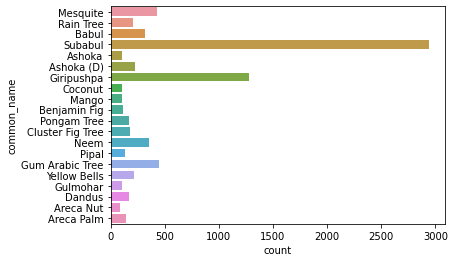

In [0]:
freq_vals = df['common_name'].value_counts()[:20].index.tolist()
freq_df = df[df['common_name'].isin(freq_vals)]
sns.countplot(y=freq_df['common_name'])

In [0]:
len(df['common_name'].value_counts())

155

###Ward wise Diversity
Wards 24, 30 and 31 have the highest diversity.
Represented below are the top most frequently occusing varieties of tress by ward.

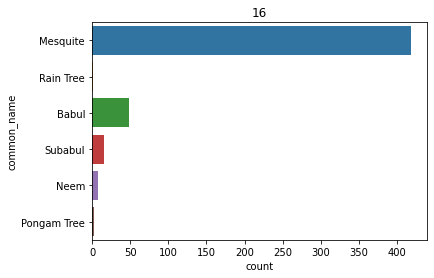

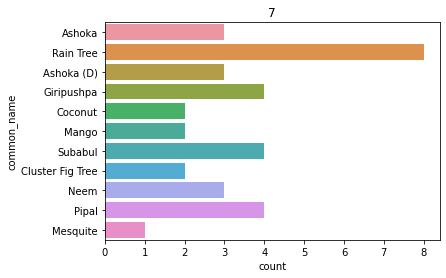

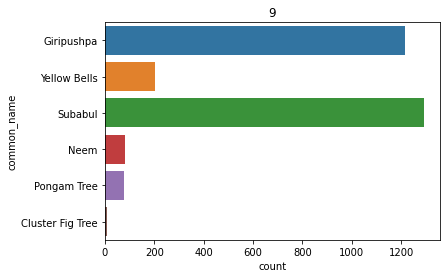

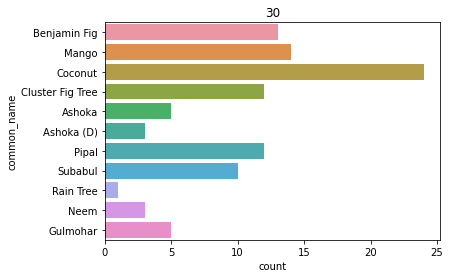

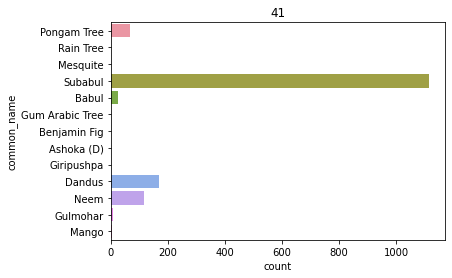

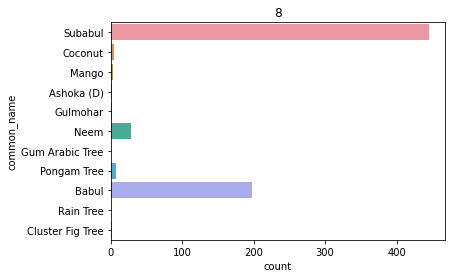

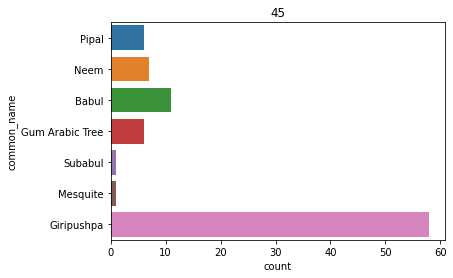

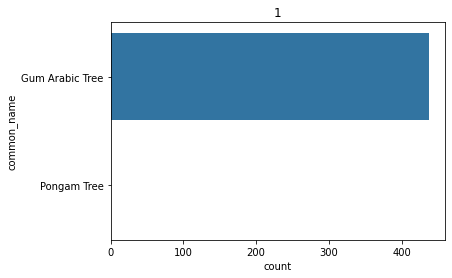

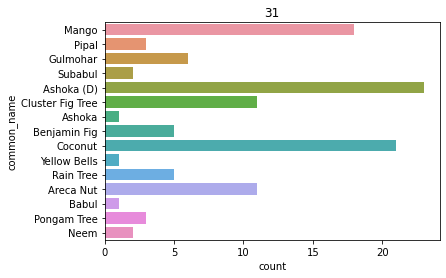

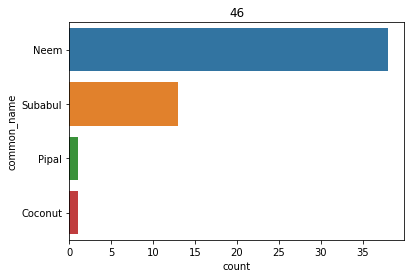

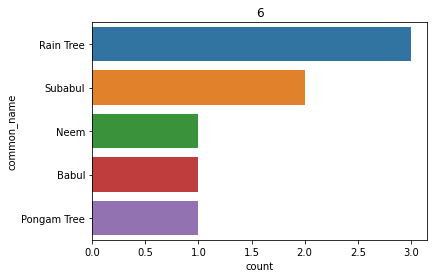

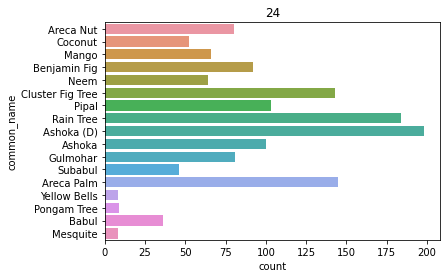

In [0]:
for i,ward in enumerate(freq_df['ward_name'].unique()):
  plot_df = freq_df[freq_df['ward_name']==ward]
  plt.figure(i)
  plt.title(ward)
  sns.countplot(y=plot_df['common_name'])

###Rare species 
There are 57 trees, across the whole region, that are classified as rare. Efforts need to be made to ensure that these trees are protected, both from natural hazards and man made inteferences, and that more trees of these particular biological types are panted

In [0]:
rare_df = df[df['is_rare']==True]
rare_df['common_name'].value_counts()

Elephant Apple        10
Sandalwood             9
Oil Palm               8
South Indian Mahua     6
Latania Palm           6
Indian Laburnum        4
Majestic Palm          4
Washingtonia Palm      3
Agathis                2
Hyophorbe Palm         1
Black Bean             1
Rudraksha              1
Black Tea Tree         1
Colville's Glory       1
Name: common_name, dtype: int64

##Tree Health
Most trees seem to be healthy, which is a good sign.
The height, girth and canopy diameter also represent the health of the trees, which are visulaized below

###Overall Health Condition

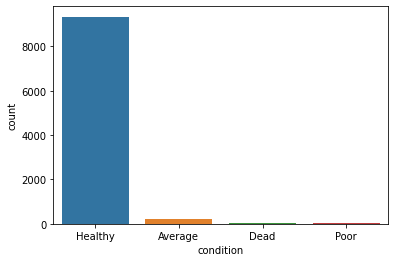

In [0]:
sns.countplot(df['condition'])

###Girth

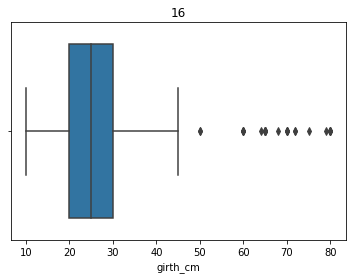

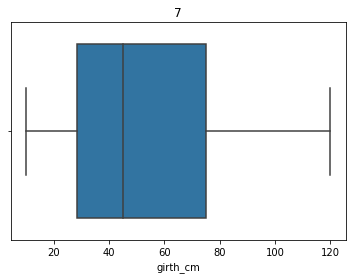

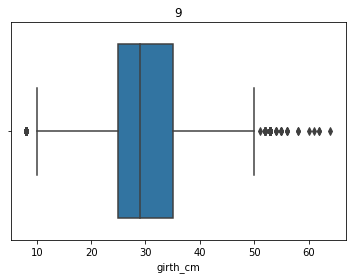

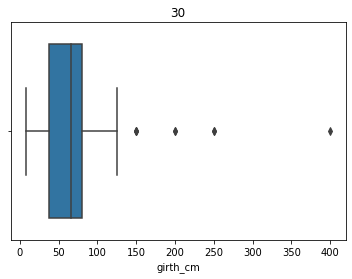

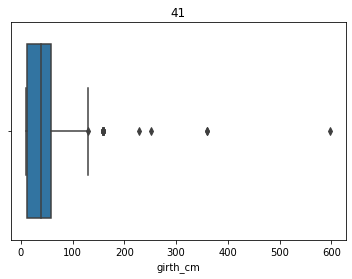

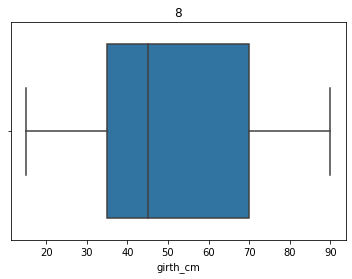

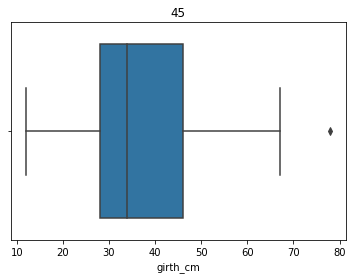

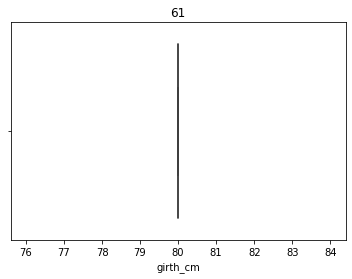

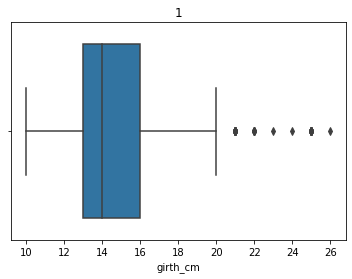

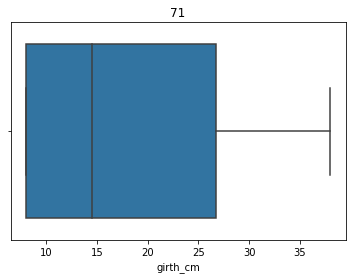

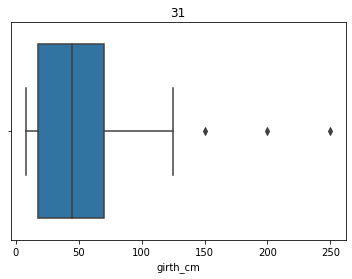

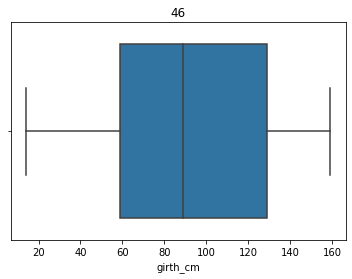

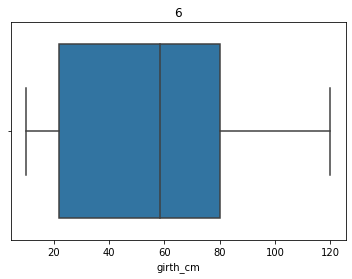

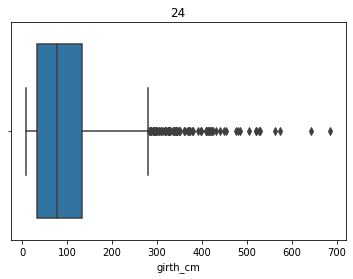

In [0]:
for i,ward in enumerate(df['ward_name'].unique()):
  plot_df = df[df['ward_name']==ward]
  plt.figure(i)
  plt.title(ward)
  sns.boxplot(plot_df['girth_cm'])

###Height

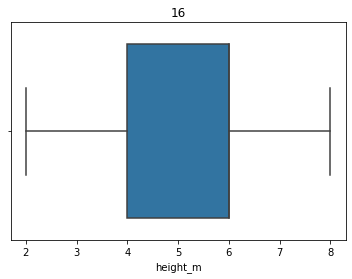

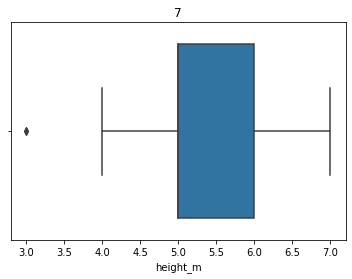

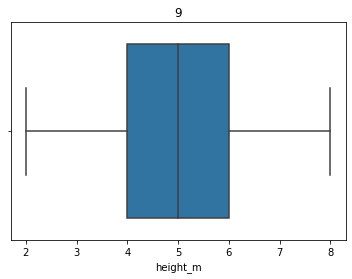

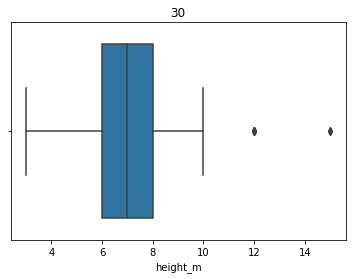

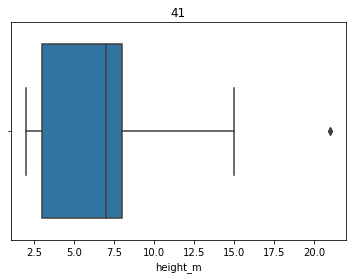

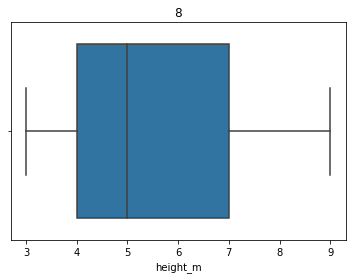

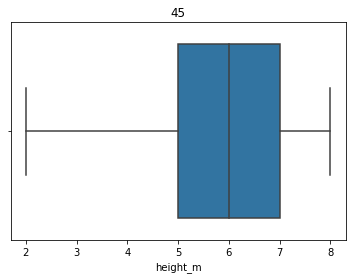

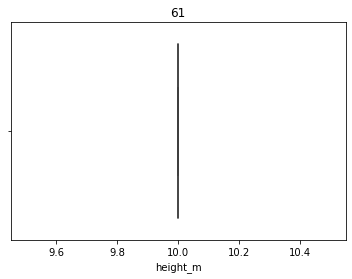

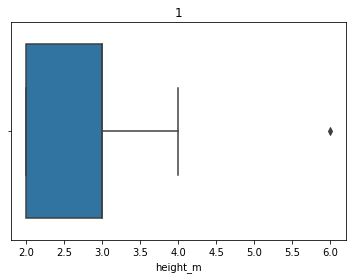

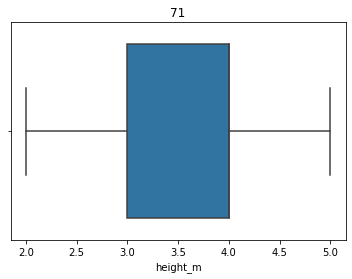

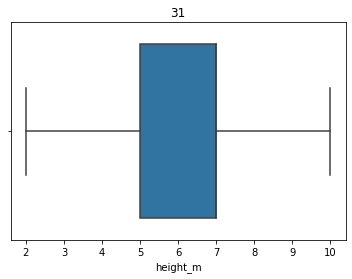

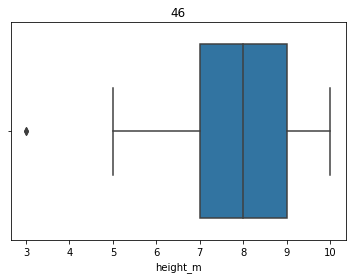

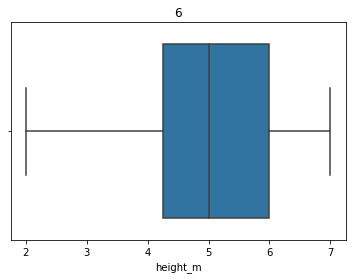

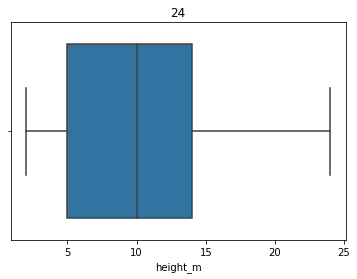

In [0]:
for i,ward in enumerate(df['ward_name'].unique()):
  plot_df = df[df['ward_name']==ward]
  plt.figure(i)
  plt.title(ward)
  sns.boxplot(plot_df['height_m'])

### Canopy Diameter

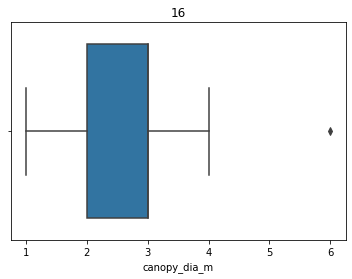

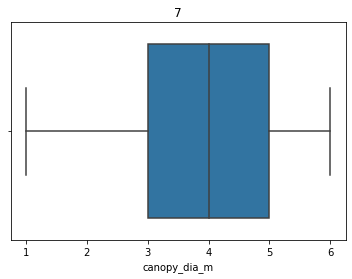

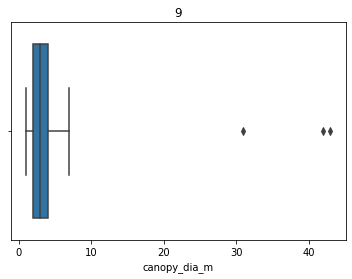

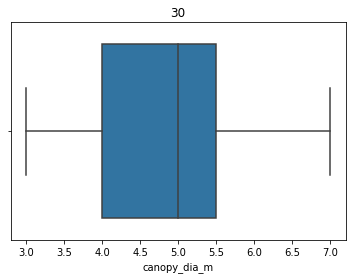

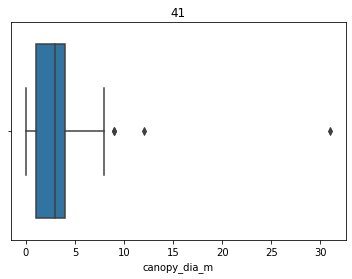

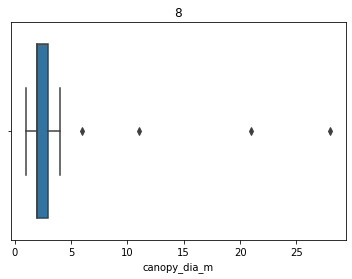

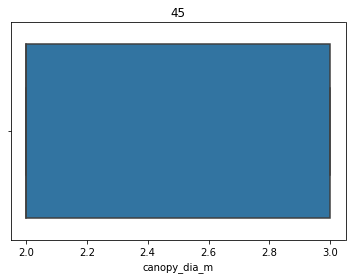

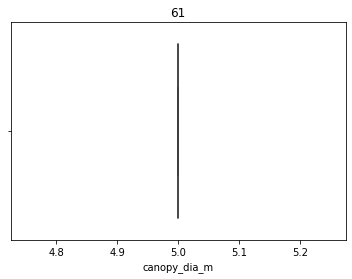

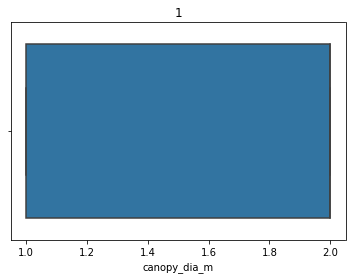

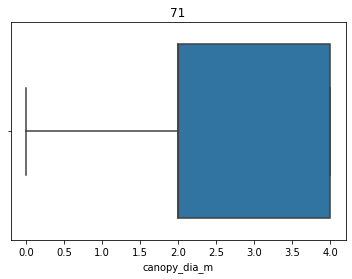

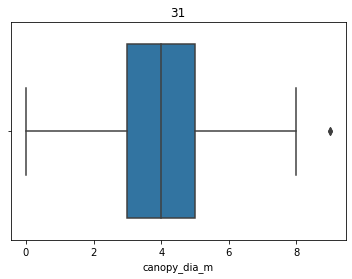

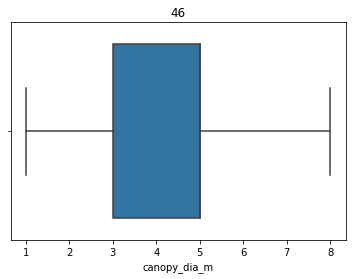

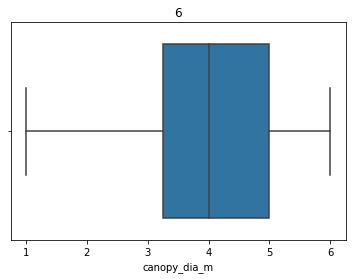

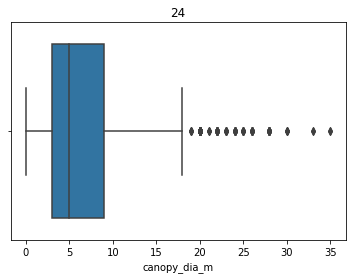

In [0]:
for i,ward in enumerate(df['ward_name'].unique()):
  plot_df = df[df['ward_name']==ward]
  plt.figure(i)
  plt.title(ward)
  sns.boxplot(plot_df['canopy_dia_m'])

## Ownership and Economic Impact

Most trees are planted and owned by the government. More effort needs to be made to spread awareness among citizens, urging them to take more initiative to plant trees in their vicinity

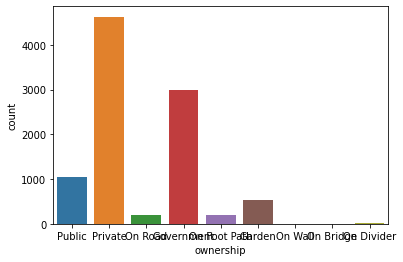

In [0]:
df['ownership'].replace('Govt', 'Government',inplace=True)
df['ownership'].replace('Footpath', 'On Foot Path',inplace=True)
sns.countplot(df['ownership'])

###Exploitation for economical use
Most trees that have been lost have been cut down mechanically, for economical value such as Timber wood.
Government regulations and laws on cutting down trees, should prevent such activities, safegurading existing trees and their population

In [0]:
for i, economic in enumerate(df['economic_i'].unique()):
    plot_df = df[df['economic_i'] == economic]
    print("Economic: {}".format(economic))
    print(plot_df['remarks'].value_counts())

Economic: Timber wood
Mechanically cut    2316
Uprooted               5
Diseased               5
On The Wall            4
Dangerous              1
Name: remarks, dtype: int64
Economic: Ornamental
Mechanically cut    338
Diseased              3
Name: remarks, dtype: int64
Economic: Fruit
Mechanically cut    206
Diseased              3
Name: remarks, dtype: int64
Economic: Firewood
Mechanically cut    1041
Uprooted               1
Name: remarks, dtype: int64
Economic: nan
Series([], Name: remarks, dtype: int64)
Economic: Medicinal
Mechanically cut    1047
On The Wall            5
Diseased               1
Name: remarks, dtype: int64
Economic: Vegetable
Mechanically cut    14
Name: remarks, dtype: int64
Economic: Essential oil
Mechanically cut    6
Name: remarks, dtype: int64
Economic: Paper industry
Mechanically cut    3
Name: remarks, dtype: int64
Economic: Spice
Series([], Name: remarks, dtype: int64)
Economic: Edible oil
Series([], Name: remarks, dtype: int64)


##Conclusion and Future Steps
In conclusion, we would like to state, that there are alot of steps that can be taken to improve the current scenario. These include, but are not limited to
- Social awareness ans effort on part of the community to inrease number and diversity of trees planted across Pune
- Governent policies to curb mechanical cutting of trees for economical benefit
- Timely survey of health conditions of trees by both, government officials and vigilant citizens
- Ensuring sufficient biodiversity among trees in every region
- Ensuting even distribution of environmental wealth across difference regions in Pune


In [0]:
df.columns

Index(['Unnamed: 0', 'FID', 'id', 'geom', 'oid', 'sr_no', 'girth_cm',
       'height_m', 'canopy_dia_m', 'condition', 'other_remarks', 'ownership',
       'society_name', 'road_name', 'northing', 'easting', 'balanced',
       'remarks', 'special_collar', 'ward_name', 'botanical_name', 'saar_uid',
       'common_name', 'local_name', 'economic_i', 'phenology', 'flowering',
       'ward', 'is_rare'],
      dtype='object')

In [0]:
reason = df['remarks'].value_counts()

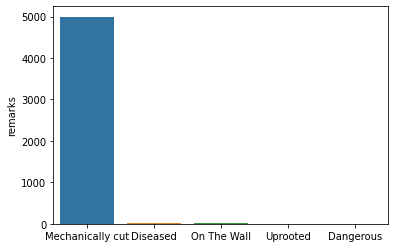

In [0]:
sns.barplot(x=reason.index,y=reason)